In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Energy Loss distribution with Sage

$\dfrac{dN}{dy}=NL\displaystyle\int_{0}^{\pi}\int_{\omega_{min}}^{\infty}\frac{d\sigma_c}{dy}(1+\cos(\alpha))dn_\gamma(\omega_0,T)d\omega_0\frac{d\Omega}{4\pi}$

In [2]:
from scipy import constants 
import numpy as np

## For the planck distribution

$dn_\gamma=\dfrac{\omega_0^2d\omega_o}{\pi^2c^3\hbar^3(\exp(\omega_0/k_BT)-1)}$

### Here the temperature was setted in 300K and all the units were handled in eV and meters

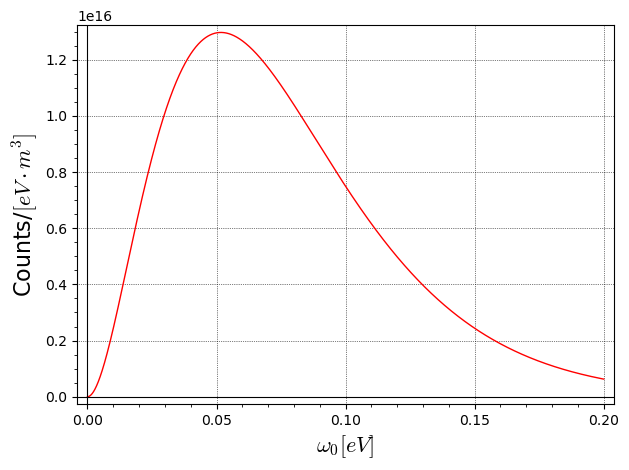

In [3]:
kB = 8.617333262e-5 #eV/K
T=300
hbarcA=197.3 #eV*nm
hbarc=hbarcA*1e-9 #eV*m
re=2.8179402894e-15 #m
w,C_a=var('w,C_a')
n(w)=w^2/(np.pi^2*hbarc^3*(np.exp(w/(kB*T)-1)))

plot1=n.plot(0,0.2,frame=true,color='red',gridlines=true)
plot1.axes_labels([r'$\omega_0[eV]$',r'Counts/$[eV\cdot m^3]$'])
plot1

## For the compton cross section

$\dfrac{d\sigma_c}{dy}=\dfrac{2\pi r_e^2}{x}\left[\dfrac{1}{1-y}+1-y-4r(1-r)\right]$

This dimentionless parameter is computed by dividing two squared energies

$x=\dfrac{4E_0\omega_0\cos^2(\alpha/2)}{m_e^2c^4}=\dfrac{2E_0\omega_0(1+\cos(\alpha))}{m_e^2c^4}$

The limits to be evaluated next has to be $x\in[0,1]$ and $\cos(\alpha)\in[-1,1]$ $\omega\in[]$

### The first plot for $\normalsize{x}$ is keeping $\normalsize{\cos(\alpha)}=1$ as a constant

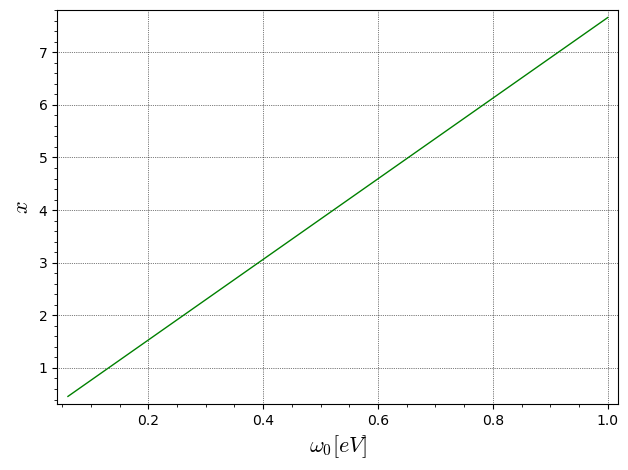

3.82964219652958

In [4]:
E=5e11 #eV
y=0.25
x(w,C_a)=2*E*w*(1+C_a)/(5.11e5)^2
plot2=x(w,1).plot(0.06,1,frame=true,gridlines=true,color='green')
plot2.axes_labels([r'$\omega_0[eV]$', r'$x$'])
plot2
x(0.5,1)

### The second one is taking $\normalsize{\omega_0=0.5}$ as a constant

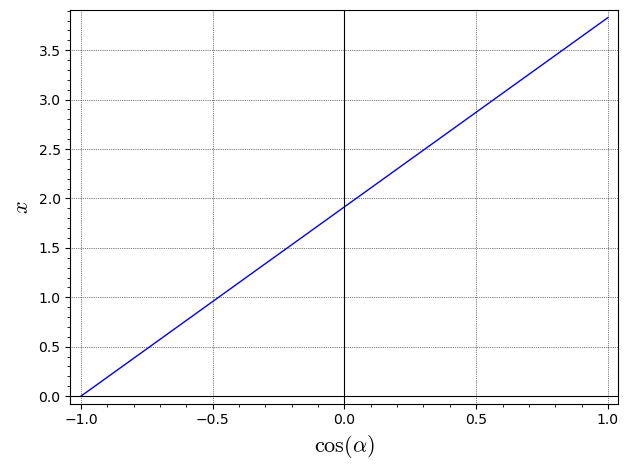

In [5]:
plot3=x(0.5,C_a).plot(-1,1,frame=true,gridlines=true)
plot3.axes_labels([r'$\cos(\alpha)$',r'$x$'])
plot3

the energy fraction of the scattered photons $y=\dfrac{\omega}{E_0}$

$r=\dfrac{y}{x(1-y)}$

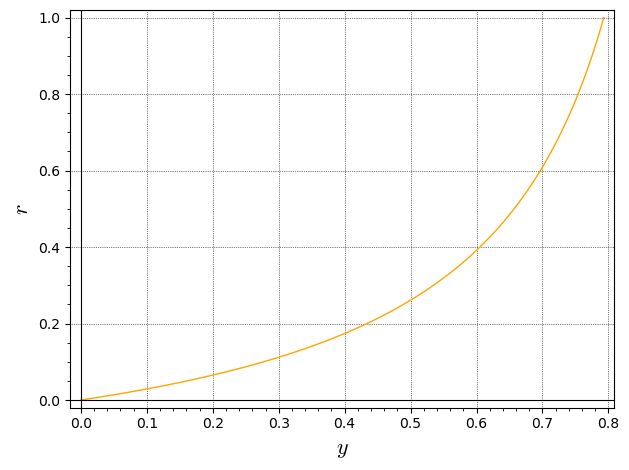

0.792945324041071

In [6]:
r(w,C_a,y)=y/(x*(1-y))
maxy=x(0.5,1)/(x(0.5,1)+1)
plot4=r(0.5,1,y).plot(0,maxy,frame=true,gridlines=true,color='orange') 
plot4.axes_labels([r'$y$',r'$r$'])
plot4
maxy

### The limits for the $y$ variable are
$0\leq y\leq y_{max}=\dfrac{x}{1+x}$

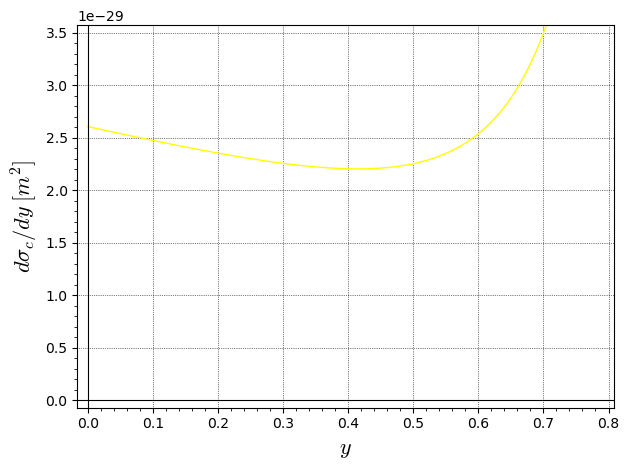

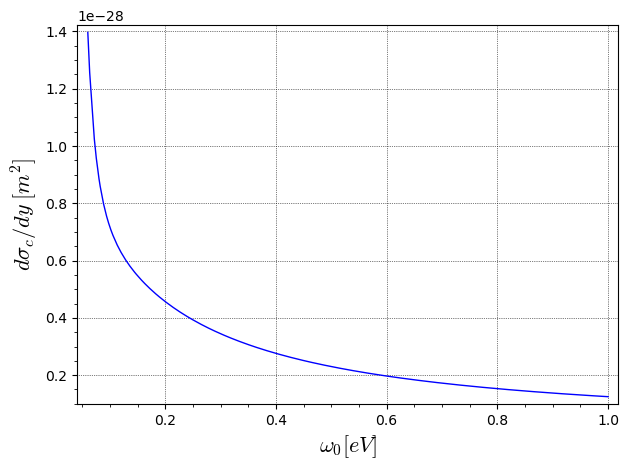

In [7]:
#to=0.25*0.511e6^2/(2*(1-0.25)*E*(1+0.5))
dsigma(w,C_a,y)=(2*np.pi*re^2/x)*(1/(1-y)+1-y-4*r*(1-r))

ymaxim(w,C_a)=x(w,C_a)/(1+x(w,C_a))

plot5=dsigma(0.5,1,y).plot(0,ymaxim(0.5,1),ymin=0,ymax=3.5e-29,frame=true,gridlines=true,color='yellow')
plot6=dsigma(w,1,0.25).plot(0.06,1,frame=true,gridlines=true,color='blue')

plot5.axes_labels([r'$y$',r'$d\sigma_c/dy\;[m^2]$'])
plot6.axes_labels([r'$\omega_0[eV]$',r'$d\sigma_c/dy\;[m^2]$'])

functions=[]
for y_i in np.linspace(0,0.5,10):
    functions.append(dsigma(0.5,0.5,y_i))

#to
plot5
plot6

## Changing the integral differencials

$\dfrac{dN}{dy}=NL\displaystyle\int_{0}^{\pi}\int_{\omega_{min}}^{\infty}\dfrac{d\sigma_c}{dy}(1+\cos(\alpha))\dfrac{dn_\gamma}{d\omega_o}(\omega_0,T)\frac{d\Omega}{4\pi}$

the change in the differencial of the solid angle is taken to be able of integrate over de incident angle of the laser:

$\dfrac{dN}{dy}=\dfrac{NL}{4\pi}\displaystyle\int_{0}^{2\pi}\int_{-1}^{1}\int_{\omega_{min}}^{\infty}\dfrac{d\sigma_c}{dy}(1+\cos(\alpha))\dfrac{dn_\gamma}{d\omega_o}d\omega_0d\cos(\alpha)d\phi$

$\dfrac{dN}{dy}=\dfrac{NL}{2}\displaystyle\int_{-1}^{1}\int_{\omega_{min}}^{\infty}\dfrac{d\sigma_c}{dy}(1+\cos(\alpha))\dfrac{dn_\gamma}{d\omega_o}d\omega_0d\cos(\alpha)$

Testing for the lower limit of the photons energy 

$\omega_{min}=\dfrac{y\cdot m_e^2c^4}{4(1-y)E_0\cos^2(\alpha/2)}$

$\omega_{min}=\dfrac{y\cdot m_e^2c^4}{2(1-y)E_0(1+\cos(\alpha))}$

In [8]:
w_min(y,C_a)=y*5.11e5^2/(2*(1-y)*E*(1+C_a))

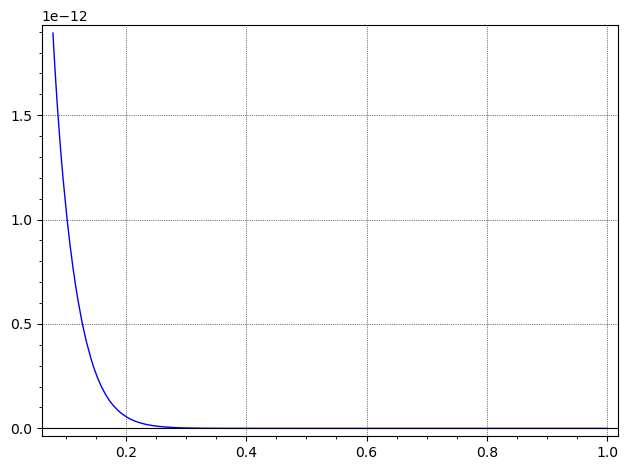

0.0791275757575758

1.26753612147315e16

In [15]:
inte_f(w,C_a,y)=dsigma*n*(1+C_a)
wmin_test=w_min(0.25,0.1)

plot8= inte_f(w,1,0.25).plot(wmin_test,1,frame=true,gridlines=true)
plot8.axes_labels('','')
plot8
wmin_test
n(0.06)